# Final Project - Part 4 - Model Draft 3B (Demo+RR vs Means of Control)

## 3B) Random Forest (Input: Demographics & Recruiter Relation; Output: Means Of Control)

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
import random
import matplotlib.pyplot as plt
import pdb

In [82]:
#Read Cleaned Global Data
GD_data_final = pd.read_csv('assets/GD_data_final.csv')
GD_data_final = GD_data_final[GD_data_final['mocNotSpecified'] == 0].reset_index(drop=True)
GD_data_final['sumMOC'] = GD_data_final['mocDebtBondage'] + GD_data_final['mocTakesEarnings'] + GD_data_final['mocRestrictsFinancialAccess'] + GD_data_final['mocThreats'] + GD_data_final['mocPsychologicalAbuse'] + GD_data_final['mocPhysicalAbuse'] + GD_data_final['mocSexualAbuse'] + GD_data_final['mocFalsePromises'] + GD_data_final['mocPsychoactiveSubstances'] + GD_data_final['mocRestrictsMovement'] + GD_data_final['mocRestrictsMedicalCare'] + GD_data_final['mocExcessiveWorkingHours'] + GD_data_final['mocUsesChildren'] + GD_data_final['mocThreatOfLawEnforcement'] + GD_data_final['mocWithholdsNecessities'] + GD_data_final['mocWithholdsDocuments'] + GD_data_final['mocOther']
GD_data_final = GD_data_final[GD_data_final['sumMOC'] > 0].reset_index(drop=True)
len(GD_data_final)

7107

In [83]:
GD_data_final.head()

,yearOfRegistration,gender,majorityStatus,ageBroad_mid,citizenshipRegion,citizenshipGeoCategory,exploitationRegion,exploitationGeoCategory,mocDebtBondage,mocTakesEarnings,...,tosPornography,tosRemoteInteractiveServices,tosPrivateSexualServices,tosNotSpecified,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown,sumMOC
0,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,1,0,0,0,0,1,2
1,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,1,0,0,0,0,1,1
2,2012,Female,Minor,13.0,North_America,North_America,North_America,North_America,0,0,...,0,0,0,0,0,0,1,0,0,4
3,2012,Male,Minor,13.0,North_America,North_America,North_America,North_America,0,0,...,0,0,0,0,0,0,0,0,1,3
4,2012,Female,Minor,13.0,North_America,North_America,North_America,North_America,0,0,...,0,0,0,0,0,0,0,1,0,3


In [84]:
GD_data_final.columns

Index([u'yearOfRegistration', u'gender', u'majorityStatus', u'ageBroad_mid',
       u'citizenshipRegion', u'citizenshipGeoCategory', u'exploitationRegion',
       u'exploitationGeoCategory', u'mocDebtBondage', u'mocTakesEarnings',
       u'mocRestrictsFinancialAccess', u'mocThreats', u'mocPsychologicalAbuse',
       u'mocPhysicalAbuse', u'mocSexualAbuse', u'mocFalsePromises',
       u'mocPsychoactiveSubstances', u'mocRestrictsMovement',
       u'mocRestrictsMedicalCare', u'mocExcessiveWorkingHours',
       u'mocUsesChildren', u'mocThreatOfLawEnforcement',
       u'mocWithholdsNecessities', u'mocWithholdsDocuments', u'mocOther',
       u'mocNotSpecified', u'isForcedLabour', u'isSexualExploit',
       u'isOtherExploit', u'isSexAndLabour', u'isForcedMarriage',
       u'isForcedMilitary', u'isOrganRemoval', u'tolAgriculture',
       u'tolAquafarming', u'tolBegging', u'tolConstruction',
       u'tolDomesticWork', u'tolHospitality', u'tolIllicitActivities',
       u'tolManufacturing', u'tolM

In [85]:
# Read Demographic vs Means of Control Data
demo_moc_calc = pd.read_csv('assets/demo_moc_calc.csv')
demo_moc_calc = demo_moc_calc[demo_moc_calc['mocNotSpecified'] == 0].reset_index(drop=True)
demo_moc_calc['sumMOC'] = demo_moc_calc['mocDebtBondage'] + demo_moc_calc['mocTakesEarnings'] + demo_moc_calc['mocRestrictsFinancialAccess'] + demo_moc_calc['mocThreats'] + demo_moc_calc['mocPsychologicalAbuse'] + demo_moc_calc['mocPhysicalAbuse'] + demo_moc_calc['mocSexualAbuse'] + demo_moc_calc['mocFalsePromises'] + demo_moc_calc['mocPsychoactiveSubstances'] + demo_moc_calc['mocRestrictsMovement'] + demo_moc_calc['mocRestrictsMedicalCare'] + demo_moc_calc['mocExcessiveWorkingHours'] + demo_moc_calc['mocUsesChildren'] + demo_moc_calc['mocThreatOfLawEnforcement'] + demo_moc_calc['mocWithholdsNecessities'] + demo_moc_calc['mocWithholdsDocuments'] + demo_moc_calc['mocOther']             
demo_moc_calc = demo_moc_calc[demo_moc_calc['sumMOC'] > 0].reset_index(drop=True)
len(demo_moc_calc)
# len(demo_moc_calc) = 18484

7107

In [86]:
demo_moc_calc.head()

,yearOfRegistration,ageBroad_mid,g_Female,g_Male,ms_Adult,cr_Central_Asia,cr_East_Africa,cr_East_Asia,cr_Eastern_Europe,cr_Middle_East,...,mocRestrictsMovement,mocRestrictsMedicalCare,mocExcessiveWorkingHours,mocUsesChildren,mocThreatOfLawEnforcement,mocWithholdsNecessities,mocWithholdsDocuments,mocOther,mocNotSpecified,sumMOC
0,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
3,2012,13.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
4,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3


In [87]:
# Carve out Just Recruiter Relation data
rr_handCalc = GD_data_final[['rrIntimatePartner','rrFriend','rrFamily','rrOther','rrUnknown']]
rr_handCalc.head(3)

,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0


In [88]:
len(rr_handCalc)

7107

In [89]:
## JOIN Demographics, Means of Control, and Recruiter Relation data
demo_rr_moc_calc = demo_moc_calc.join(rr_handCalc)
demo_rr_moc_calc.head(3)

,yearOfRegistration,ageBroad_mid,g_Female,g_Male,ms_Adult,cr_Central_Asia,cr_East_Africa,cr_East_Asia,cr_Eastern_Europe,cr_Middle_East,...,mocWithholdsNecessities,mocWithholdsDocuments,mocOther,mocNotSpecified,sumMOC,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown
0,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
1,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,1,0,0


In [90]:
len(demo_rr_moc_calc)

7107

In [91]:
def make_mocMulti(x):
    if x['sumMOC'] > 1:
        return 1
    else:
        return 0

demo_rr_moc_calc['mocMultiple'] = demo_rr_moc_calc.apply(make_mocMulti, axis=1)
demo_rr_moc_calc[['mocMultiple','mocDebtBondage']].groupby('mocMultiple').count()

,mocDebtBondage
mocMultiple,
0,2117
1,4990


In [92]:
demo_rr_moc_calc.columns

Index([u'yearOfRegistration', u'ageBroad_mid', u'g_Female', u'g_Male',
       u'ms_Adult', u'cr_Central_Asia', u'cr_East_Africa', u'cr_East_Asia',
       u'cr_Eastern_Europe', u'cr_Middle_East', u'cr_North_America',
       u'cr_Northeast_Africa', u'cr_South_America', u'cr_South_Asia',
       u'cr_Southeast_Asia', u'cr_Southeastern_Europe', u'cr_Unknown',
       u'cr_West_Africa', u'cg_Africa', u'cg_Asia', u'cg_Europe',
       u'cg_Middle_East', u'cg_North_America', u'cg_South_America',
       u'cg_Unknown', u'mocDebtBondage', u'mocTakesEarnings',
       u'mocRestrictsFinancialAccess', u'mocThreats', u'mocPsychologicalAbuse',
       u'mocPhysicalAbuse', u'mocSexualAbuse', u'mocFalsePromises',
       u'mocPsychoactiveSubstances', u'mocRestrictsMovement',
       u'mocRestrictsMedicalCare', u'mocExcessiveWorkingHours',
       u'mocUsesChildren', u'mocThreatOfLawEnforcement',
       u'mocWithholdsNecessities', u'mocWithholdsDocuments', u'mocOther',
       u'mocNotSpecified', u'sumMOC', u'rr

In [80]:
## Collapse the moc columns
def combine_moc(x):
    if x['mocDebtBondage'] == 1:
        return 'DebtBondage'
    elif x['mocTakesEarnings'] == 1:
        return 'TakesEarnings'
    elif x['mocRestrictsFinancialAccess'] == 1:
        return 'RestrictsFinancialAccess'
    elif x['mocPsychologicalAbuse'] == 1:
        return 'PsychologicalAbuse'
    elif x['mocPhysicalAbuse'] == 1:
        return 'PhysicalAbuse'
    elif x['mocSexualAbuse'] == 1:
        return 'SexualAbuse'
    elif x['mocFalsePromises'] == 1:
        return 'FalsePromises'
    elif x['mocPsychoactiveSubstances'] == 1:
        return 'PsychoactiveSubstances'
    elif x['mocRestrictsMovement'] == 1:
        return 'RestrictsMovement'
    elif x['mocRestrictsMedicalCare'] == 1:
        return 'RestrictsMedicalCare'
    elif x['mocExcessiveWorkingHours'] == 1:
        return 'ExcessiveWorkingHours'
    elif x['mocUsesChildren'] == 1:
        return 'UsesChildren'
    elif x['mocThreatOfLawEnforcement'] == 1:
        return 'ThreatOfLawEnforcement'
    elif x['mocWithholdsNecessities'] == 1:
        return 'WithholdsNecessities'
    elif x['mocWithholdsNecessities'] == 1:
        return 'WithholdsNecessities'
    elif x['mocWithholdsDocuments'] == 1:
        return 'WithholdsDocuments'
    elif x['mocOther'] == 1:
        return 'Other'
    elif x['mocMultiple'] == 1:
        return 'Multiple'
    else:
        return 0
        
demo_rr_moc_calc['mocType'] = demo_rr_moc_calc.apply(combine_moc,axis=1)
demo_rr_moc_calc[['mocType','mocDebtBondage']].groupby('mocType').count()

,mocDebtBondage
mocType,
0,180
DebtBondage,888
ExcessiveWorkingHours,10
FalsePromises,282
Other,248
PhysicalAbuse,830
PsychoactiveSubstances,470
PsychologicalAbuse,1679
RestrictsFinancialAccess,45


In [58]:
demo_rr_moc_calc.head()

,yearOfRegistration,ageBroad_mid,g_Female,g_Male,ms_Adult,cr_Central_Asia,cr_East_Africa,cr_East_Asia,cr_Eastern_Europe,cr_Middle_East,...,mocOther,mocNotSpecified,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown,sumMOC,mocMultiple,mocType
1,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,2,1,mocDebtBondage
2,2010,19.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,mocDebtBondage
3,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4,1,mocPsychologicalAbuse
4,2012,13.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,mocPsychologicalAbuse
5,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,1,mocPhysicalAbuse


In [ ]:
demo_rr_moc_calc = demo_rr_moc_calc['yearOfRegistration','ageBroad_mid','g_Female','g_Male','ms_Adult',
                                    'cr_Central_Asia','cr_East_Africa','cr_East_Asia','cr_Eastern_Europe','cr_Middle_East',
                                    'cr_North_America','cr_Northeast_Africa','cr_South_America','cr_South_Asia',
                                    'cr_Southeast_Asia','cr_Southeastern_Europe','cr_West_Africa','','','']

In [56]:
demo_rr_moc_calc = demo_rr_moc_calc[demo_rr_moc_calc['mocType'] != 0]  ### drop the unknown rows
demo_rr_moc_calc[['mocType','mocDebtBondage']].groupby('mocType').count()

,mocDebtBondage
mocType,
mocDebtBondage,888
mocExcessiveWorkingHours,10
mocFalsePromises,282
mocOther,248
mocPhysicalAbuse,830
mocPsychoactiveSubstances,470
mocPsychologicalAbuse,1679
mocRestrictsFinancialAccess,45
mocRestrictsMedicalCare,3


In [57]:
len(demo_rr_moc_calc)

6927

Random Forest Train Accuracy ::  0.321701720841
Random Forest Logistic regression Test Accuracy ::  0.287997027127
Cross validating...
Random Forest - train accuracy: 
0.296850079745
X: 
Index([u'ageBroad_mid', u'g_Female', u'ms_Adult', u'cr_Central_Asia',
       u'cr_East_Africa', u'cr_East_Asia', u'cr_Eastern_Europe',
       u'cr_Middle_East', u'cr_North_America', u'cr_Northeast_Africa',
       u'cr_South_America', u'cr_South_Asia', u'cr_Southeast_Asia',
       u'cr_Southeastern_Europe', u'cr_West_Africa', u'rrIntimatePartner',
       u'rrFriend', u'rrFamily', u'rrOther'],
      dtype='object')
Feature Importance: 
[ 0.205  0.095  0.077  0.044  0.005  0.006  0.196  0.004  0.031  0.005  0.
  0.017  0.024  0.     0.001  0.064  0.027  0.037  0.163]


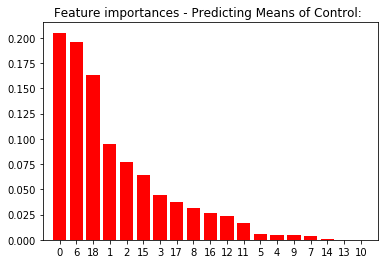

Classes: 
[array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64)]


ValueError: Must pass 2-d input

In [39]:
# Try OneVsRestClassifier - Multilabel classification method
def demo_rr_moc_main():
 
    demo_rr_moc_headers = ['ageBroad_mid','g_Female',
                              'cr_Central_Asia', 'cr_East_Africa', 'cr_East_Asia', 'cr_Eastern_Europe', 'cr_Middle_East', 
                              'cr_North_America', 'cr_Northeast_Africa', 'cr_South_America', 'cr_South_Asia', 
                              'cr_Southeast_Asia', 'cr_Southeastern_Europe', 'cr_West_Africa', 
                                'rrIntimatePartner', 'rrFriend', 'rrFamily', 
                                'mocDebtBondage', 'mocTakesEarnings',
                               'mocRestrictsFinancialAccess', 'mocThreats', 'mocPsychologicalAbuse',
                               'mocPhysicalAbuse', 'mocSexualAbuse', 'mocFalsePromises',
                               'mocPsychoactiveSubstances', 'mocRestrictsMovement',
                               'mocRestrictsMedicalCare', 'mocExcessiveWorkingHours',
                               'mocUsesChildren', 'mocThreatOfLawEnforcement',
                               'mocWithholdsNecessities', 'mocWithholdsDocuments', 'mocOther']
    
    ### Train Test Split - Out put col index -1 
    X = demo_rr_moc_calc[demo_rr_moc_headers[:-17]]
    y = demo_rr_moc_calc[demo_rr_moc_headers[-17:-1]]
    train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7)
    
    model = RandomForestClassifier(n_estimators=10)
    model.fit(train_x, train_y)

    print "Random Forest Train Accuracy :: ", metrics.accuracy_score(train_y, model.predict(train_x))
    print "Random Forest Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, model.predict(test_x))
    
    print ("Cross validating...")
    print ("Random Forest - train accuracy: ")
    print (np.mean(cross_val_score(model, train_x, train_y.values, scoring='accuracy', cv=10)))

    print ("X: ")
    print (X.columns)
    
    #Feature Importances - Break down weights of each feature
    print ("Feature Importance: ")
    importances = model.feature_importances_.round(3)
    print (importances)
    
    ## Graphing Feature Importances
    std = np.std([importances],axis=0)
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances - Predicting Means of Control: ")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), demo_rr_moc_headers[:-17])
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    print ("Classes: ")
    print (model.classes_)
    
    # Predict Probabilities
    # pp = model.predict_proba(X)    
    cols = ['mocDebtBondage', 'mocTakesEarnings',
            'mocRestrictsFinancialAccess', 'mocThreats', 'mocPsychologicalAbuse',
            'mocPhysicalAbuse', 'mocSexualAbuse', 'mocFalsePromises',
            'mocPsychoactiveSubstances', 'mocRestrictsMovement',
            'mocRestrictsMedicalCare', 'mocExcessiveWorkingHours',
            'mocUsesChildren', 'mocThreatOfLawEnforcement',
            'mocWithholdsNecessities', 'mocWithholdsDocuments', 'mocOther']    
    df_pp = pd.DataFrame(model.predict_proba(X),cols)
    df_data_pp = GD_data_final.join(df_pp)
    print (df_pp.head())
    
  
if __name__ == '__main__':
  demo_rr_moc_main()